# Used Cars Dataset
## Biel Altimira

### 1.Utilitats

In [1]:
# Importem les llibreries que necesitem

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Carreguem les dades en un datafram de pandas

file = ("vehicles.csv")
data = pd.read_csv(file)

In [3]:
# Opcions pel display de dataframes

pd.set_option("max_columns", None)

### 2. Neteja de les dades


In [37]:
data.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,rwd,NaN,coupe,NaN,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:07-0600


In [5]:
data.isnull().sum()


id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

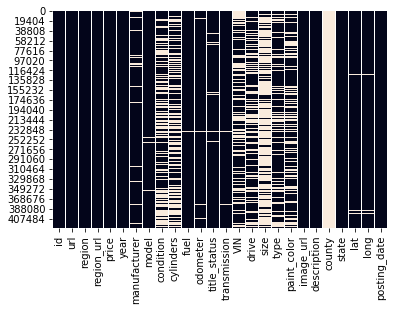

In [18]:
sns.heatmap(data.isnull(), cbar=False)

In [6]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})

In [7]:
missing_value_df.head(30)

,column_name,percent_missing
id,id,0.000000
url,url,0.000000
region,region,0.000000
region_url,region_url,0.000000
price,price,0.000000
year,year,0.282281
manufacturer,manufacturer,4.133714
model,model,1.236179
condition,condition,40.785232
cylinders,cylinders,41.622470


In [9]:
data = data.drop(["county", "url", "region_url", "VIN", "image_url", ], axis=1)

ValueError: labels ['county' 'url' 'region_url' 'VIN' 'image_url'] not contained in axis

# 1

In [10]:
dropped_data = data.copy()
dropped_data.drop("size", axis=1)
dropped_data.dropna(axis = 0, inplace=True)

In [11]:
dropped_data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592000,-85.51890,2021-05-03T14:02:03-0500
55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,blue,Here I have a unmolested Ford F-250 6.0 power ...,al,32.547500,-85.46820,2021-04-29T17:19:18-0500
59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,"Readily available. Excellent condition, clean ...",al,32.628739,-85.46182,2021-04-27T12:20:01-0500
65,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,white,"Ford Super Duty F450 , XL with King Ranch seat...",al,32.630400,-85.40160,2021-04-26T11:15:36-0500
73,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,"2017 dodge charger rt runs great $15,000.00",al,32.822400,-85.77040,2021-04-24T18:39:59-0500


In [12]:
dropped_data.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [13]:
dropped_data.shape

(79016, 21)

# 2

In [53]:
clean_data = data.copy()

In [57]:
dropped_data["year"] = dropped_data.dropna(axis = 0)



In [68]:
nulls = clean_data[clean_data.isnull().any(axis=1)]
nulls.head(2000)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
0,7222695916,prescott,6000,NaN,NaN,NaN,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,fayetteville,11900,NaN,NaN,NaN,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,florida keys,21000,NaN,NaN,NaN,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,greensboro,4900,NaN,NaN,NaN,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,hudson valley,1600,NaN,NaN,NaN,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,hudson valley,1000,NaN,NaN,NaN,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,hudson valley,15995,NaN,NaN,NaN,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,erie,3000,NaN,NaN,NaN,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [61]:
clean_data["condition"].fillna(clean_data["condition"].mode()[0], inplace=True)

In [76]:
dropped_data["cylinders"] = dropped_data["cylinders"].apply(lambda x : x.split(" ")[0])
clean_data["cylinders"].fillna(dropped_data["cylinders"].mode()[0], inplace=True)

In [82]:
clean_data["drive"].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [83]:
clean_data["drive"].fillna(clean_data["drive"].mode()[0], inplace=True)

In [85]:
clean_data["size"].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'], dtype=object)

In [86]:
clean_data["size"].fillna(clean_data["size"].mode()[0], inplace=True)

In [88]:
clean_data["type"].unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible', 'wagon'], dtype=object)

In [89]:
clean_data["type"].fillna(clean_data["type"].mode()[0], inplace=True)

In [92]:
clean_data["paint_color"].unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [93]:
clean_data["paint_color"].fillna(clean_data["paint_color"].mode()[0], inplace=True)

In [ ]:
dropped_data.dropna(axis = 0, inplace=True)

In [94]:
clean_data.isnull().sum()

id                  0
region              0
price               0
year             1205
manufacturer    17646
model            5277
condition           0
cylinders           0
fuel             3013
odometer         4400
title_status     8242
transmission     2556
drive               0
size                0
type                0
paint_color         0
description        70
state               0
lat              6549
long             6549
posting_date       68
dtype: int64

In [65]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 21 columns):
id              426880 non-null int64
region          426880 non-null object
price           426880 non-null int64
year            425675 non-null float64
manufacturer    409234 non-null object
model           421603 non-null object
condition       426880 non-null object
cylinders       249202 non-null object
fuel            423867 non-null object
odometer        422480 non-null float64
title_status    418638 non-null object
transmission    424324 non-null object
drive           296313 non-null object
size            120519 non-null object
type            334022 non-null object
paint_color     296677 non-null object
description     426810 non-null object
state           426880 non-null object
lat             420331 non-null float64
long            420331 non-null float64
posting_date    426812 non-null object
dtypes: float64(4), int64(2), object(15)
memory usage: 68.4+ MB


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
0,7222695916,prescott,6000,NaN,NaN,NaN,good,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,fayetteville,11900,NaN,NaN,NaN,good,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,florida keys,21000,NaN,NaN,NaN,good,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,good,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,greensboro,4900,NaN,NaN,NaN,good,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
